# Projekt - PR

## Opis

Opis problema: Raziskovali bomo prodajo (oz. registracijo novih vozi). Pri teh podatkih se bomo osredotočili na podatke o motorju vozila; torej o porabi, prostornini, vrsti goriva in izpustih. Iz le-teh bomo pridobili podatke o tem, koliko motroji posatajao učinkovitejši. Prav tako lahko z kombiniranjem teh podatkov z spolom, starostjo in ali je vozilo registrirala pravna oseba ugotovimo, koliko učinkovitost motorja vpliva pri nakupu vozil.

Cilji: Spreminjanje motorjev skozi čas. Pridobiti podatke o učinkovitosti motorja. Koliko je učinkovitost motorja pri nakupu avta pomembna za osebe ali podjetja. Napovedati kdaj bodo električni avtomobili dosegli 50% od vseh novih registracij.

Vir podatkov:
    - https://podatki.gov.si - Prvič registrirana vozila po mesecih
    - https://data.europa.eu/euodp

Oblka podatkov: Podatki so txt obliki. Iz podatkov "Prvič registrirana vozila po mesecih" lahko razberemo podatke o osebi, ki je registrirala avto (spol, starost, ...) in podatke oavtomobilu (poraba, medosna razdalja, max teža, model avta, ...)

## Podatki

Pridobili smo podatke o avtih iz slovenije. Le-te smo tudi že uredili.

Pri pridobivanju evropskih podatkov, še nismo uspeli najti takšnih, ki bi nam najbolj ustrezali.

## Procesiranje podatkov

### Branje

Začeli smo z branjem podatkov iz datoteke.

Podatki so ločeni z ";", ampak pojavil se je problem, da je bil le-ta znak uporabljen tudi za ločevanje podatkov znotraj že ločenih podatkov.
Zaradi tega, smo se odločili podatke ločevati z znakom "\"" in zavreči vsak 2. znak (ki je v tem primeru ";").

Vse kar se je prebralo shranimo v tabelo data, ki vsebuje slovarje, kjer so po atributih shranjeni podatki za posamezne vrstice.

Ker je datoteka zelo velika (1 200 000 vsrtic) in ker to zasede zelo veliko pomnilnika in časa ko je shranjeno in ko se obdeluje, bomo za samo testiranje delovanja kode uporabljali datoteko sestavljeno iz prvih 10 000 vrstic originalne datoteke.

In [9]:
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader

file = open('podatki_vozila_SLO_urejeno_okrajsano.txt', 'r', encoding='latin-1')
data = []

attributes = []

for attr in file.readline().split(";"):
    attributes.append(attr)
    
for i, line in enumerate(file):
    dataLine = {}
    dataLine["id"] = i
    
    for l, item in enumerate(line.split("\"")):
        if(l%2 != 0):
            dataLine[attributes[(int)((l-1)/2)]] = item
    
    data.append(dataLine)
    
    #if(i % 1000 == 0):
    #    print("Nalaganje", i/100+10)
    
print("Nalaganje končano")

Nalaganje končano


## Shranjevanje prebranih podatkov

Spodaj je primer kako so podatki shranjeni.

Iz spodnjih podatkov bomo kasneje odranili večino atributov, saj nas ne zanimajo.

In [42]:
print(data[309])

{'"V.5-Delci pri dizel motorjih"': '', '"M-Medosje"': '1686', '"P.2.3-Delovna napetost"': '52', '"O.3-Navpicna obremenitev vlecne naprave / sedla"': '', '"P.2.4-Pogonske baterije"': 'Li-ion / 1 / 52', '"X.2-Homologacijska oznaka zascitne konstrukcije"': '', '"K-Homologacijska oznaka vozila"': 'e2*2002/24*0051*03', '"Z.1-Dovoljene pnevmatike in platisca"': '1 - 125/80 R13 (65) M, 4 B 13 23.5, 4 J 13 23.52 - 145/80 R13 (75) M, 4 B 13 23.5, 4 J 13 23.5', '"P.2.2-Nazivna trajna moc"': '4', '"N.1-Dovoljene osne obremenitve"': '295/425', '"O.1.1-Priklopnik"': '', '"J-Kategorija in vrsta vozila (opis)"': 'lahko Å¡tirikolo', '"C-Ali je uporabnik tudi lastnik vozila"': 'DA', '"T-Najvisja hitrost"': '45', '"Z.2-Homologacijska oznaka vlecne naprave"': '', '"V.6-Korigiran absorpcijski koeficient pri dizel motorjih"': '', '"C-Ali je uporabnik pravna ali fizicna oseba"': 'F', '"J-Kategorija in vrsta vozila (oznaka)"': 'L6e', '"Y.3-Visina"': '1451', '"D.5-Datum izdaje COC dokumenta oz. prve registrac

### Nekaj prikazov podatkov

Vrsta goriva

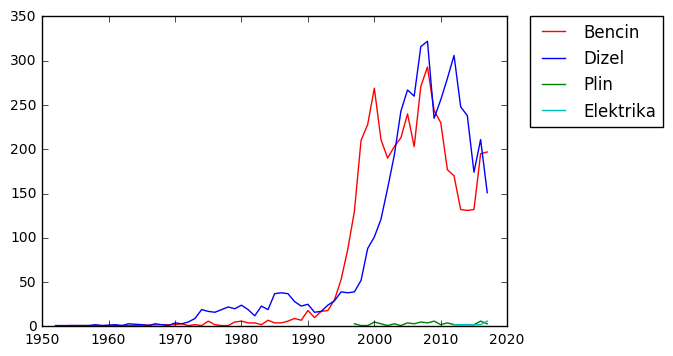

In [45]:
letaIzdelave = [[], [], [], []]

x=[[], [], [], []]
y=[[], [], [], []]

for podatek in data:
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        letaIzdelave[0].append(podatek['"5A-Leto izdelave"'])
        #y[0].append(podatek['"B-Datum prve registracije vozila"'])
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        letaIzdelave[1].append(podatek['"5A-Leto izdelave"'])
        #y[1].append(podatek['"B-Datum prve registracije vozila"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        letaIzdelave[2].append(podatek['"5A-Leto izdelave"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Ni goriva" and podatek['"P.2.4-Pogonske baterije"'] != "":
        letaIzdelave[3].append(podatek['"5A-Leto izdelave"'])
        
for i in 0, 1, 2, 3:
    for leto in sorted(letaIzdelave[i]):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(letaIzdelave[i].count(leto))
            
            
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.plot(x[3], y[3], "c-", label="Elektrika")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Kupovanje avtov glede na spol

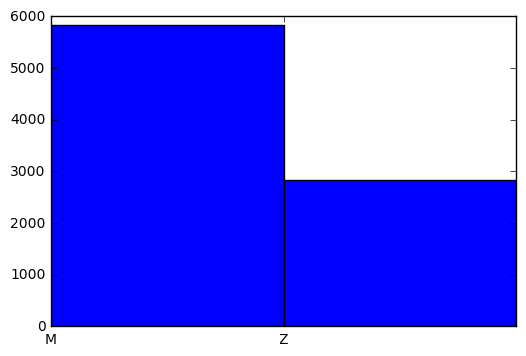

In [25]:
m = 0
z = 0

for podatek in data:
    if podatek['"C-Spol uporabnika (ce gre za fizicno osebo)"'] == "M":
        m += 1
    elif podatek['"C-Spol uporabnika (ce gre za fizicno osebo)"'] == "Z":
        z += 1

y = [m, z]
N = len(y)
x = range(N)

plt.figure(1)
plt.bar(x, y, 1, color="blue")
plt.xticks(range(N))
plt.gca().set_xticklabels(["M", "Ž"])
plt.show()

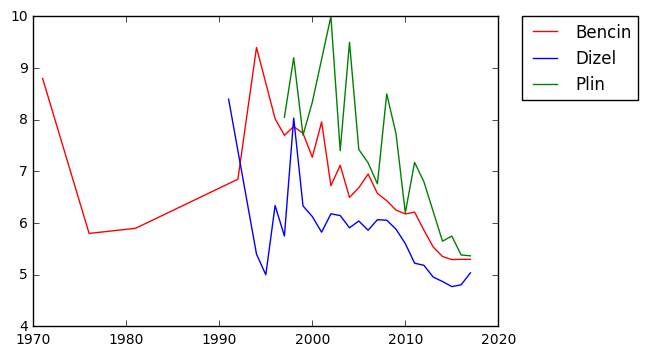

In [18]:
#dict.setdefault(key, default=0)
letaIzdelave = [[], [], []]

povpPoraba = [{}, {}, {}]

x=[[], [], []]
y=[[], [], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        letaIzdelave[0].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[0]:
            value = povpPoraba[0][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[0][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[0][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[0][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        #povpPoraba[0][podatek['"5A-Leto izdelave"']] = [povpPoraba[0][podatek['"5A-Leto izdelave"']]+podatek['"5A-Leto izdelave"'], ]
        #y[0].append(podatek['"B-Datum prve registracije vozila"'])
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        letaIzdelave[1].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[1]:
            value = povpPoraba[1][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[1][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[1][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[1][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
        #y[1].append(podatek['"B-Datum prve registracije vozila"'])
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        letaIzdelave[2].append(podatek['"5A-Leto izdelave"'])
        
        if podatek['"5A-Leto izdelave"'] in povpPoraba[2]:
            value = povpPoraba[2][podatek['"5A-Leto izdelave"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[2][podatek['"5A-Leto izdelave"']][1] + 1
            povpPoraba[2][podatek['"5A-Leto izdelave"']] = [value, stev]
        else:
            povpPoraba[2][podatek['"5A-Leto izdelave"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
for i in 0, 1, 2:
    for leto in sorted(povpPoraba[i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpPoraba[i][leto][0]/povpPoraba[i][leto][1])
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

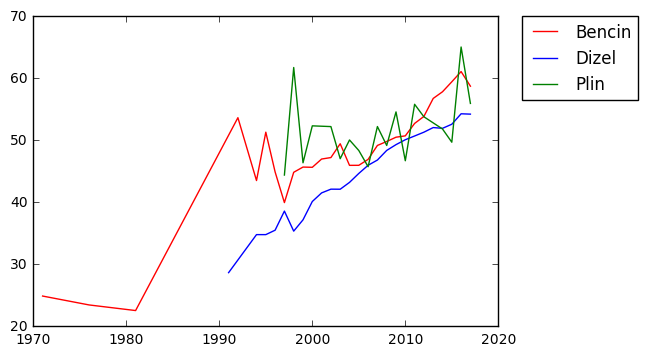

In [55]:
arrId = 0

povpKonjNaLiter = [{}, {}, {}]

x=[[], [], []]
y=[[], [], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        arrId = 0
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        arrId = 1
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        arrId = 2
    
    konjNaLiter = float(podatek['"P.1.2-Nazivna moc"'].replace(',','.')) / (float(podatek['"P.1.1-Delovna prostornina"'].replace(',','.')) / 1000)
    
    if podatek['"5A-Leto izdelave"'] in povpKonjNaLiter[arrId]:
        value = povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']][0] + konjNaLiter
        stev = povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']][1] + 1
        povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']] = [value, stev]
    else:
        povpKonjNaLiter[arrId][podatek['"5A-Leto izdelave"']]  = [konjNaLiter, 1]

        
for i in 0, 1, 2:
    for leto in sorted(povpKonjNaLiter[i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpKonjNaLiter[i][leto][0]/povpKonjNaLiter[i][leto][1])
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

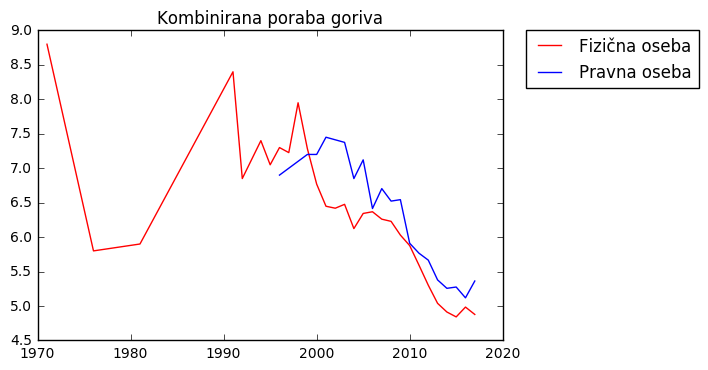

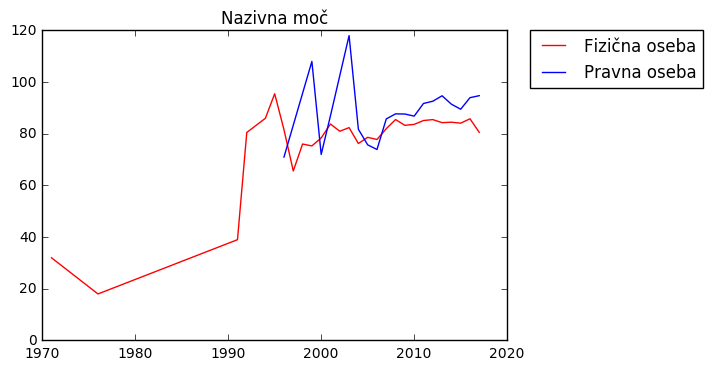

In [24]:
arrId = 0

povpPoraba_Moc = [[{}, {}], [{}, {}]]

x=[[], []]
y=[[], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"C2-Ali je lastnik pravna ali fizicna oseba"'] == "F":
        arrId = 0
    elif podatek['"C2-Ali je lastnik pravna ali fizicna oseba"'] == "P":
        arrId = 1
    
    
    poraba = float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
    moc = float(podatek['"P.1.2-Nazivna moc"'].replace(',','.'))
    
    if podatek['"5A-Leto izdelave"'] in povpPoraba_Moc[0][arrId]:
        value = povpPoraba_Moc[0][arrId][podatek['"5A-Leto izdelave"']][0] + poraba
        stev = povpPoraba_Moc[0][arrId][podatek['"5A-Leto izdelave"']][1] + 1
        povpPoraba_Moc[0][arrId][podatek['"5A-Leto izdelave"']] = [value, stev]
        
        value = povpPoraba_Moc[1][arrId][podatek['"5A-Leto izdelave"']][0] + moc
        stev = povpPoraba_Moc[1][arrId][podatek['"5A-Leto izdelave"']][1] + 1
        povpPoraba_Moc[1][arrId][podatek['"5A-Leto izdelave"']] = [value, stev]
    else:
        povpPoraba_Moc[0][arrId][podatek['"5A-Leto izdelave"']]  = [poraba, 1]
        
        povpPoraba_Moc[1][arrId][podatek['"5A-Leto izdelave"']]  = [moc, 1]

        
for i in 0, 1:
    for leto in sorted(povpPoraba_Moc[0][i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpPoraba_Moc[0][i][leto][0]/povpPoraba_Moc[0][i][leto][1])
            
plt.figure(0)
plt.title("Kombinirana poraba goriva")
plt.plot(x[0], y[0], "r-", label="Fizična oseba")
plt.plot(x[1], y[1], "b-", label="Pravna oseba")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


x=[[], []]
y=[[], []]

for i in 0, 1:
    for leto in sorted(povpPoraba_Moc[1][i].keys()):
        if(leto not in x[i]):
            x[i].append(leto)
            y[i].append(povpPoraba_Moc[1][i][leto][0]/povpPoraba_Moc[1][i][leto][1])
            
plt.figure(1)
plt.title("Nazivna moč")
plt.plot(x[0], y[0], "r-", label="Fizična oseba")
plt.plot(x[1], y[1], "b-", label="Pravna oseba")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [27]:
import csv

#Ok JAKA, tole sem naredil takole, če pogledaš veh0205, imaš velikosti motorjev pa leta, js sm vzel samo za GREAT BRITAN
#V enem slovarju bo leto ključ, vrednost pa terka vrednosti število avtov, in procent avtov
#Nujno rabiš tisto csv verzijo, ker sm vn briso useless stvari, tti del programa nebo deloval če daš drug ods nt
#Delo se na končnico slovarjev _all _petrol _diesel
#vsi so isto vlki, torej vsaka vrstica bo v vseh treh verzijah isto leto

#SLOVARJI ZA ALL
slovar_let_st_procent_1_1000_all = {}
slovar_let_st_procent_1001_1550_all = {}
slovar_let_st_procent_1551_2000_all = {}
slovar_let_st_procent_2001_2500_all = {}
slovar_let_st_procent_2501_3000_all = {}
slovar_let_st_procent_3000_naprej_all = {}
slovar_let_st_procent_total_all = {}

#SLOVARJI ZA PETROL
slovar_let_st_procent_1_1000_petrol = {}
slovar_let_st_procent_1001_1550_petrol = {}
slovar_let_st_procent_1551_2000_petrol = {}
slovar_let_st_procent_2001_2500_petrol = {}
slovar_let_st_procent_2501_3000_petrol = {}
slovar_let_st_procent_3000_naprej_petrol = {}
slovar_let_st_procent_total_petrol = {}

#SLOVARJI ZA DIZEL
slovar_let_st_procent_1_1000_diesel = {}
slovar_let_st_procent_1001_1550_diesel = {}
slovar_let_st_procent_1551_2000_diesel = {}
slovar_let_st_procent_2001_2500_diesel = {}
slovar_let_st_procent_2501_3000_diesel = {}
slovar_let_st_procent_3000_naprej_diesel = {}
slovar_let_st_procent_total_diesel = {}

zacetek = 0
prva_tabela = []

with open('veh0205.csv') as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for line in tsvreader:
        if (zacetek > 1 and zacetek < 26):
            prva_tabela.append(line)
        if (zacetek > 26 and zacetek < 51):
            prva_tabela.append(line)
        zacetek += 1

for x in range(24):
    prvo_splittano = prva_tabela[x][0].split(";")
    drugo_splittano = prva_tabela[x+24][0].split(";")
    slovar_let_st_procent_1_1000_all[prvo_splittano[0]] = (prvo_splittano[1], drugo_splittano[1])
    slovar_let_st_procent_1001_1550_all[prvo_splittano[0]] = (prvo_splittano[2], drugo_splittano[2])
    slovar_let_st_procent_1551_2000_all[prvo_splittano[0]] = (prvo_splittano[3], drugo_splittano[3])
    slovar_let_st_procent_2001_2500_all[prvo_splittano[0]] = (prvo_splittano[4], drugo_splittano[4])
    slovar_let_st_procent_2501_3000_all[prvo_splittano[0]] = (prvo_splittano[5], drugo_splittano[5])
    slovar_let_st_procent_3000_naprej_all[prvo_splittano[0]] = (prvo_splittano[6], drugo_splittano[6])
    slovar_let_st_procent_total_all[prvo_splittano[0]] = (prvo_splittano[8], prvo_splittano[9])

zacetek_petrol = 0
prva_tabela_petrol = []

with open('veh0205_petrol.csv') as tsvfile_petrol:
    tsvreader_petrol = csv.reader(tsvfile_petrol, delimiter="\t")
    for line in tsvreader_petrol:
        if (zacetek_petrol > 1 and zacetek_petrol < 26):
            prva_tabela_petrol.append(line)
        if (zacetek_petrol > 26 and zacetek_petrol < 51):
            prva_tabela_petrol.append(line)
        zacetek_petrol += 1


for x in range(24):
    prvo_splittano = prva_tabela_petrol[x][0].split(";")
    drugo_splittano = prva_tabela_petrol[x+24][0].split(";")
    slovar_let_st_procent_1_1000_petrol[prvo_splittano[0]] = (prvo_splittano[1], drugo_splittano[1])
    slovar_let_st_procent_1001_1550_petrol[prvo_splittano[0]] = (prvo_splittano[2], drugo_splittano[2])
    slovar_let_st_procent_1551_2000_petrol[prvo_splittano[0]] = (prvo_splittano[3], drugo_splittano[3])
    slovar_let_st_procent_2001_2500_petrol[prvo_splittano[0]] = (prvo_splittano[4], drugo_splittano[4])
    slovar_let_st_procent_2501_3000_petrol[prvo_splittano[0]] = (prvo_splittano[5], drugo_splittano[5])
    slovar_let_st_procent_3000_naprej_petrol[prvo_splittano[0]] = (prvo_splittano[6], drugo_splittano[6])
    slovar_let_st_procent_total_petrol[prvo_splittano[0]] = (prvo_splittano[8], prvo_splittano[9])

zacetek_diesel = 0
prva_tabela_diesel = []

with open('veh0205_diesel.csv') as tsvfile_diesel:
    tsvreader_diesel = csv.reader(tsvfile_diesel, delimiter="\t")
    for line in tsvreader_diesel:
        if (zacetek_diesel > 1 and zacetek_diesel < 26):
            prva_tabela_diesel.append(line)
        if (zacetek_diesel > 26 and zacetek_diesel < 51):
            prva_tabela_diesel.append(line)
        zacetek_diesel += 1

for x in range(24):
    prvo_splittano = prva_tabela_diesel[x][0].split(";")
    drugo_splittano = prva_tabela_diesel[x+24][0].split(";")
    slovar_let_st_procent_1_1000_diesel[prvo_splittano[0]] = (prvo_splittano[1], drugo_splittano[1])
    slovar_let_st_procent_1001_1550_diesel[prvo_splittano[0]] = (prvo_splittano[2], drugo_splittano[2])
    slovar_let_st_procent_1551_2000_diesel[prvo_splittano[0]] = (prvo_splittano[3], drugo_splittano[3])
    slovar_let_st_procent_2001_2500_diesel[prvo_splittano[0]] = (prvo_splittano[4], drugo_splittano[4])
    slovar_let_st_procent_2501_3000_diesel[prvo_splittano[0]] = (prvo_splittano[5], drugo_splittano[5])
    slovar_let_st_procent_3000_naprej_diesel[prvo_splittano[0]] = (prvo_splittano[6], drugo_splittano[6])
    slovar_let_st_procent_total_diesel[prvo_splittano[0]] = (prvo_splittano[8], prvo_splittano[9])



In [37]:
slovar_let_st_procent_total_all

{'1994': ('21.069,20', '1.589'),
 '1995': ('21.394,10', '1.604'),
 '1996': ('22.237,50', '1.619'),
 '1997': ('22.831,70', '1.636'),
 '1998': ('23.293,30', '1.653'),
 '1999': ('23.974,90', '1.669'),
 '2000': ('24.405,50', '1.679'),
 '2001': ('25.125,90', '1.689'),
 '2002': ('25.781,90', '1.700'),
 '2003': ('26.240,40', '1.713'),
 '2004': ('27.028,10', '1.724'),
 '2005': ('27.520,40', '1.735'),
 '2006': ('27.609,20', '1.743'),
 '2007': ('28.000,30', '1.750'),
 '2008': ('28.160,70', '1.750'),
 '2009': ('28.246,50', '1.750'),
 '2010': ('28.420,90', '1.746'),
 '2011': ('28.467,30', '1.740'),
 '2012': ('28.722,50', '1.735'),
 '2013': ('29.140,90', '1.729'),
 '2014': ('29.611,50', '1.724'),
 '2015': ('30.250,30', '1.719'),
 '2016': ('30.850,40', '1.714'),
 '2017': ('31.200,20', '1.709')}

In [38]:
slovar_let_st_procent_total_petrol

{'1994': ('19.493,20', '1.563'),
 '1995': ('19.499,80', '1.574'),
 '1996': ('20.051,60', '1.586'),
 '1997': ('20.384,70', '1.600'),
 '1998': ('20.590,50', '1.614'),
 '1999': ('21.031,00', '1.628'),
 '2000': ('21.232,60', '1.635'),
 '2001': ('21.641,10', '1.641'),
 '2002': ('21.839,50', '1.647'),
 '2003': ('21.805,50', '1.654'),
 '2004': ('21.976,60', '1.658'),
 '2005': ('21.876,00', '1.662'),
 '2006': ('21.465,80', '1.663'),
 '2007': ('21.264,40', '1.662'),
 '2008': ('20.899,10', '1.656'),
 '2009': ('20.491,20', '1.649'),
 '2010': ('20.083,10', '1.639'),
 '2011': ('19.548,50', '1.625'),
 '2012': ('19.158,80', '1.613'),
 '2013': ('18.870,30', '1.598'),
 '2014': ('18.632,60', '1.584'),
 '2015': ('18.511,70', '1.571'),
 '2016': ('18.410,50', '1.557'),
 '2017': ('18.348,30', '1.544')}

In [39]:
slovar_let_st_procent_total_diesel

{'1994': ('1.573,90', '1.907'),
 '1995': ('1.891,30', '1.910'),
 '1996': ('2.181,60', '1.917'),
 '1997': ('2.440,50', '1.929'),
 '1998': ('2.692,90', '1.941'),
 '1999': ('2.929,90', '1.955'),
 '2000': ('3.152,70', '1.965'),
 '2001': ('3.459,50', '1.978'),
 '2002': ('3.912,40', '1.986'),
 '2003': ('4.399,60', '1.999'),
 '2004': ('5.010,60', '2.007'),
 '2005': ('5.596,10', '2.014'),
 '2006': ('6.083,30', '2.020'),
 '2007': ('6.657,40', '2.023'),
 '2008': ('7.163,50', '2.018'),
 '2009': ('7.641,40', '2.012'),
 '2010': ('8.202,70', '2.002'),
 '2011': ('8.763,50', '1.989'),
 '2012': ('9.385,10', '1.978'),
 '2013': ('10.064,20', '1.967'),
 '2014': ('10.730,90', '1.958'),
 '2015': ('11.428,90', '1.952'),
 '2016': ('12.052,10', '1.946'),
 '2017': ('12.360,20', '1.944')}

9989
10
[[66, 102, 136, 183, 272, 330, 385, 341, 363, 405, 462, 520, 483, 620, 641, 496, 495, 473, 493, 399, 386, 322, 439, 390], [2, 2, 6], [21067.100000000002, 21391.1, 22233.199999999997, 22825.2, 23283.4, 23960.9, 24385.3, 25100.6, 25751.9, 26205.1, 26987.199999999997, 27472.1, 27549.1, 27921.800000000003, 28062.6, 28132.6, 28285.8, 28312.0, 28543.9, 28934.5, 29363.5, 29940.6, 30462.6, 30708.5], [2.099999999998545, 3.0, 4.30000000000291, 6.5, 9.899999999997817, 14.0, 20.200000000000728, 25.30000000000291, 30.0, 35.30000000000291, 40.900000000001455, 48.30000000000291, 60.10000000000218, 78.49999999999636, 98.10000000000218, 113.90000000000146, 135.10000000000218, 155.29999999999927, 178.59999999999854, 206.40000000000146, 248.0, 309.7000000000007, 387.8000000000029, 491.7000000000007]]


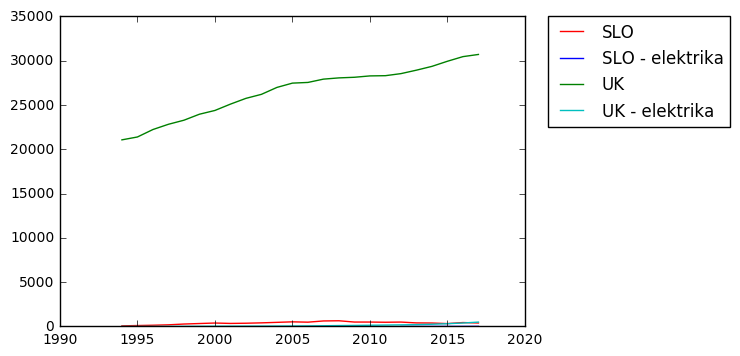

In [84]:
letaIzdelave = [[], []]
letaIzdelaveUK = [[], []]

x=[[], [], [], []]
y=[[], [], [], []]

for podatek in data:
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Ni goriva" and podatek['"P.2.4-Pogonske baterije"'] != "":
        letaIzdelave[1].append(podatek['"5A-Leto izdelave"'])
    else:
        letaIzdelave[0].append(podatek['"5A-Leto izdelave"'])
        
print(len(letaIzdelave[0]))
print(len(letaIzdelave[1]))

for leto in range(1994, 2018):
    diesel_petrol = float(slovar_let_st_procent_total_petrol[str(leto)][0].replace('.', '').replace(',', '.')) + float(slovar_let_st_procent_total_diesel[str(leto)][0].replace('.', '').replace(',', '.'))
    
    #letaIzdelaveUK[0].append(diesel_petrol)
    #letaIzdelaveUK[1].append(float(slovar_let_st_procent_total_all[str(leto)][0].replace('.', '').replace(',', '.')) - diesel_petrol)
    
    x[2].append(leto)
    x[3].append(leto)
    
    y[2].append(diesel_petrol)
    y[3].append(float(slovar_let_st_procent_total_all[str(leto)][0].replace('.', '').replace(',', '.')) - diesel_petrol)
                             
for i in 0, 1:
    for leto in sorted(letaIzdelave[i]):
        if(leto not in x[i]) and int(leto) < 2018 and int(leto) > 1993:
            x[i].append(leto)
            y[i].append(letaIzdelave[i].count(leto))


print(y)

            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="SLO")
plt.plot(x[1], y[1], "b-", label="SLO - elektrika")
plt.plot(x[2], y[2], "g-", label="UK")
plt.plot(x[3], y[3], "c-", label="UK - elektrika")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()